# Lead Scoring Case Study

In [127]:
#Importing the necessary librabries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## *Data Reading*

In [128]:
df = pd.read_csv('Leads.csv')
df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [130]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [131]:
df.shape

(9240, 37)

In [132]:
# When no option is chosen in the form it will be left with the select option
df = df.replace('Select',np.nan)

## *Data Cleaning and Manipulation*

In [133]:
#Checking percentage of null values on each column
df.isnull().sum()*100 / len(df)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [134]:
#Check columns which have null values more than 45%
columns_v45 = []
for column in df.columns:
    if (df[column].isnull().sum() * 100 / len(df)) > 45:
        columns_v45.append(column)

print("Columns which have missing values more than 45% are :" , columns_v45)

Columns which have missing values more than 45% are : ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


- Though we intend to keep **How did you hear about X education** to  know about awareness, it is anyhow pointed out by 
**Lead Source** we will drop it

In [135]:
for column in df.columns:
        print("\n" + column)
        print(df[column].value_counts(normalize=True,dropna=False))


Prospect ID
1c6bd735-d520-4f61-b1ef-372acaf885eb    0.000108
d95f0a67-4d8f-48c7-82f3-214d834f042f    0.000108
9c6a79b8-0599-4594-aa00-761fde73b344    0.000108
947564c9-a98d-4014-8302-3acbf4377e2a    0.000108
abcd546c-d947-4fb1-8da6-0bbd1f368363    0.000108
                                          ...   
ccd0f62b-f1aa-41f9-baf4-e5e38b300e21    0.000108
2d16315d-5afa-401e-b21a-66467bebaa70    0.000108
60f6fe47-82b0-4b05-97c8-566f1de48ff1    0.000108
e8b43335-2f3c-4f2c-84d9-a2fd4ad3375f    0.000108
3931ac0e-878f-48d9-9771-197185306681    0.000108
Name: Prospect ID, Length: 9240, dtype: float64

Lead Number
608255    0.000108
596233    0.000108
656682    0.000108
592824    0.000108
652580    0.000108
            ...   
631489    0.000108
600768    0.000108
598556    0.000108
616923    0.000108
655360    0.000108
Name: Lead Number, Length: 9240, dtype: float64

Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Impo

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Approached upfront              0.000108
View in browser link Clicked    0.000108
Email Received                  0.000108
Resubscribed to emails          0.000108
Form Submitted on Website       0.000108
Name: Last Notable Activity, dtype: float64


In [136]:
#Finding the columns in which a particualr value has a frequency count >= 90% i.e the column is higly skewed
most_freq_value = ''                   # the most freqent value in a column
freq_lst = []                          # List of the frequencies of the highest frquency value in each column

for column in df.columns:
    most_freq_value = df[column].value_counts().nlargest(n=1).index[0]
    count = 0
    for i in df[column]:
        if i==most_freq_value:
            count+=1
    frequency = round((count/len(df)*100),2)
    freq_lst.append(frequency)

#Check whether we have any column in which a particualr has frequency rate more than 90%
freq_dict = dict(zip(df.columns , freq_lst))
hskew_columns =[]                       #Columns which have a high skew rate >=90%
for key , value in freq_dict.items():
    if freq_dict[key] >= 90.0:
        hskew_columns.append(key)

print("Columns which are highly skewed :" , hskew_columns)

Columns which are highly skewed : ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


### Dropping of the columns
- with null value percentage more than 45%
- which are highly skewed 
- UniqueID and other columns which are not required during analysis

In [137]:
# drop column_v45  : List of columns which have > 45% of missing values
df.drop(columns_v45, axis = 1 , inplace = True)

- *Though we intend to keep both **Do not Mail** and **Do not call** , the skewed value is very high for **Do not Call** i.e 99.9% ,So we drop **Do not Call** and keep **Do not mail** even though skewed value is 92% due to business need*
- *Since **Tags** are assigned after the sales call we can drop this from business aspect*
- *The **Last Activity** and **Last Notable Activity** since both are same we will drop one*
- *We also drop any one of the ID as this is not used in analsysis ,here we drop Prospect ID*

In [138]:
df.drop(['Prospect ID','Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
         'Digital Advertisement','Through Recommendations', 'Receive More Updates About Our Courses', 'Tags',
         'Update me on Supply Chain Content','Get updates on DM Content', 'I agree to pay the amount through cheque',
        'Last Notable Activity'],axis = 1 , inplace = True)

In [139]:
df.shape

(9240, 15)

### Imputing the null value according to business needs
- Replacing null Values with already present value in the categorical column
- Replacing null values with the mode of the categorical column
- Replacing null values with mean/medain in teh numerical columns 

In [140]:
df.isnull().sum()*100 / len(df)

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
City                                             39.707792
A free copy of Mastering The Interview            0.000000
dtype: float64

In [141]:
# replace nan with already presesnt level 'unknown' in Country
df['Country'] = df['Country'].replace(np.nan,'unknown')

# replace nan with 'Other' in Specialization      
df['Specialization']= df['Specialization'].replace(np.nan,'Other')

# replace nan with already presesnt level 'unknown' in What is your current occupation
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan,'Other')

# replace nan with already presesnt level 'unknown' in What matters most to you in choosing a course
df['What matters most to you in choosing a course']= df['What matters most to you in choosing a course'].replace(np.nan,'Other')

# replace nan with already presesnt level 'Other Cities' in City       
df['City']= df['City'].replace(np.nan,'Other Cities')

In [142]:
# 'Google' and 'Email Opened' are the most frequenced/mode in the below columns
df['Lead Source'].fillna('Google', inplace= True)
df['Last Activity'].fillna('Email Opened', inplace= True)

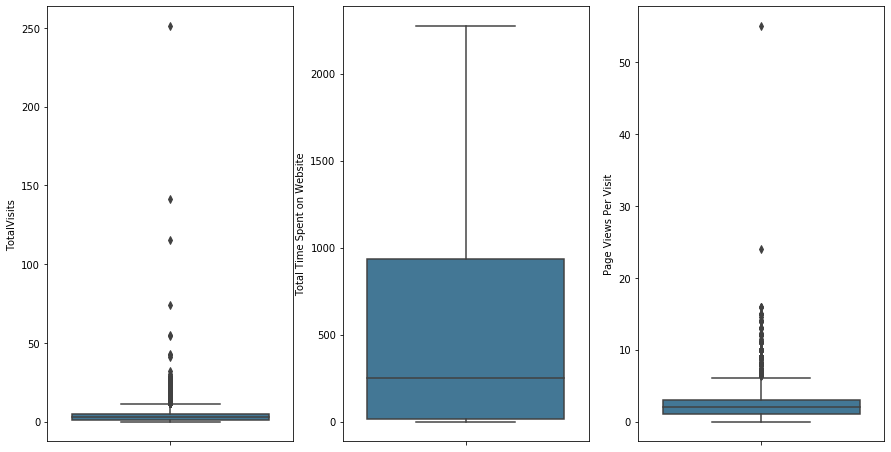

In [143]:
#lets check the outliers in the numeric variables   
plt.figure(figsize=(15,8))

plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits' , data = df , palette = 'mako' )

plt.subplot(1,3,2)
sns.boxplot(y = 'Total Time Spent on Website' , data = df , palette = 'mako')

plt.subplot(1,3,3)
sns.boxplot(y = 'Page Views Per Visit' , data = df , palette = 'mako')

plt.show()

In [144]:
#Since there are many outliers in the totalvisits and the Page Views per visit the null values will be replace by median
df['TotalVisits'].fillna(df['TotalVisits'].median(), inplace= True)
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(), inplace= True)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

### Regrouping the categories in the columns where they have more categories , here num. of categories >15.

In [146]:
df.nunique()

Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
What is your current occupation                     6
What matters most to you in choosing a course       3
City                                                6
A free copy of Mastering The Interview              2
dtype: int64

In [147]:
for column in ['Lead Source','Last Activity','Country','Specialization']:
        print("\n" + column)
        print(df[column].value_counts(normalize=True,dropna=False))


Lead Source
Google               0.314286
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
bing                 0.000649
google               0.000541
Click2call           0.000433
Social Media         0.000216
Press_Release        0.000216
Live Chat            0.000216
blog                 0.000108
Pay per Click Ads    0.000108
youtubechannel       0.000108
testone              0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64

Last Activity
Email Opened                    0.383117
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Web

In [148]:
# The values of LeadSorce where there frequency is less than 1% is categorized into Other category
df['Lead Source'] = df['Lead Source'].replace(['google'],'Google')
df['Lead Source'] = df['Lead Source'].replace(['Facebook','bing','Click2call','Social Media','Press_Release','Live Chat',
                                              'NC_EDM','WeLearn','Pay per Click Ads','testone','welearnblog_Home','blog',
                                              'youtubechannel'],'Other')

# The lastActivity is categorosied in to groups according to business needs
df['Last Activity'] = df['Last Activity'].replace(['Email Opened','Page Visited on Website','Email Link Clicked','View in browser link Clicked','Resubscribed to emails'],'Info Viewed')
df['Last Activity'] = df['Last Activity'].replace(['SMS Sent','Email Received'],'Cotacted')
df['Last Activity'] = df['Last Activity'].replace(['Email Bounced','Unreachable'],'Unreachable')
df['Last Activity'] = df['Last Activity'].replace(['Unsubscribed','Email Marked Spam'],'Uninterested')
df['Last Activity'] = df['Last Activity'].replace(['Olark Chat Conversation','Form Submitted on Website','Had a Phone Conversation','Approached upfront','Visited Booth in Tradeshow'],'Interested')

# Since except India all the other countries have frequency of less than 1% categoridsed to outside India
df['Country']= df["Country"].apply(lambda x: 'India' if x=='India' else('unknown' if x=='unknown' else 'Outside-India'))

# The Specilization is categorosied in to smilar groups and less frequency groups i/e less than 2% is categorised to others
df['Specialization'] = df['Specialization'].replace(['Finance Management','Banking, Investment And Insurance'] ,'Finance Management')
df['Specialization'] = df['Specialization'].replace(['Human Resource Management'] ,'HR Management')
df['Specialization'] = df['Specialization'].replace(['Business Administration','International Business','Supply Chain Management'] ,'Business Management')
df['Specialization'] = df['Specialization'].replace(['Healthcare Management','Hospitality Management','E-COMMERCE','Retail Management','Rural and Agribusiness','E-Business','Services Excellence'] ,'Other')

In [149]:
for column in df.columns:
        print("\n" + column)
        print(df[column].value_counts(normalize=True,dropna=False))


Lead Number
608255    0.000108
596233    0.000108
656682    0.000108
592824    0.000108
652580    0.000108
            ...   
631489    0.000108
600768    0.000108
598556    0.000108
616923    0.000108
655360    0.000108
Name: Lead Number, Length: 9240, dtype: float64

Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

Lead Source
Google              0.314827
Direct Traffic      0.275216
Olark Chat          0.189935
Organic Search      0.124892
Reference           0.057792
Welingak Website    0.015368
Referral Sites      0.013528
Other               0.008442
Name: Lead Source, dtype: float64

Do Not Email
No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

Converted
0    0.61461
1    0.38539
Name: Converted, dtype: float64

TotalVisits
0.0      0.236905
2.0      0.181818
3.0      0.156169
4.0    

## *EDA*

**Univariate Analysis**

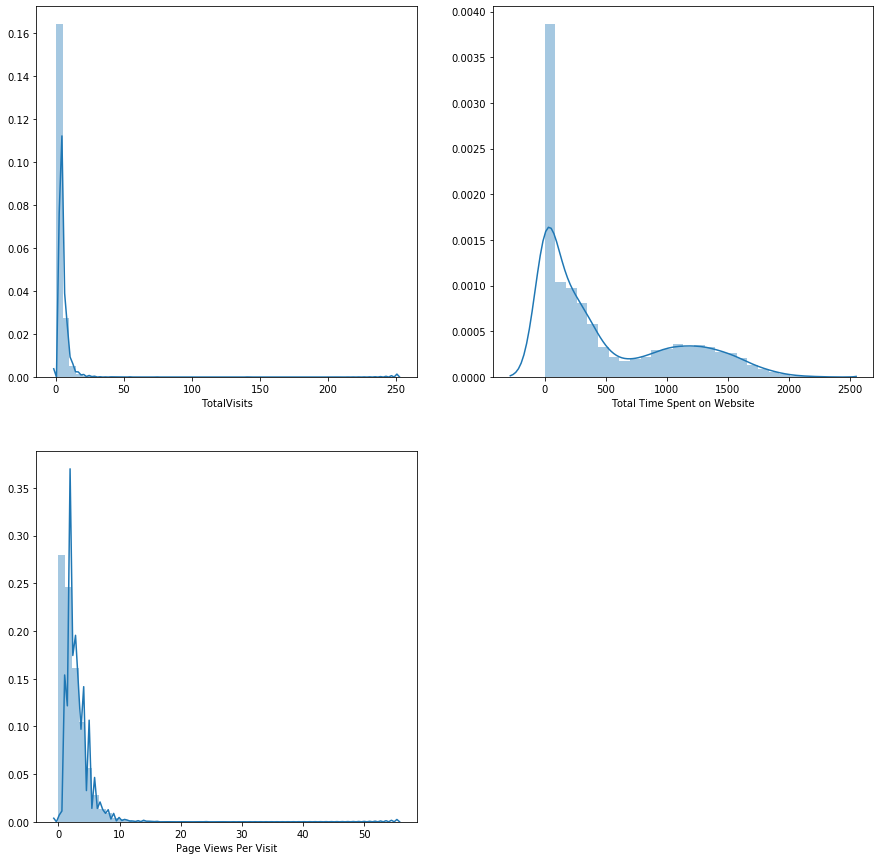

In [150]:
# Distribution of values in the numerical columns
factors = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize =(15,15))
for i in enumerate(factors):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(df[i[1]])

- As we can see all the numeric variables above are unimodular

**Bivariate Analysis**

<Figure size 1080x1080 with 0 Axes>

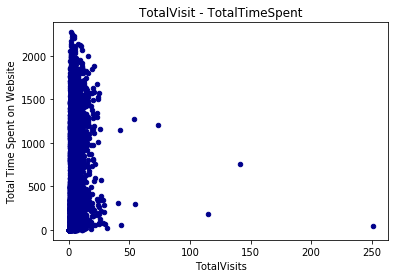

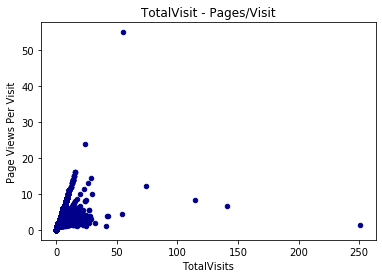

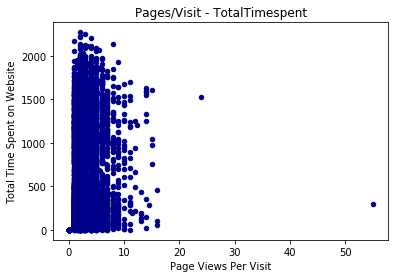

In [151]:
# Scatter plot to check how one numerical variable relation to other
plt.figure(figsize =(15,15))

df.plot.scatter(x='TotalVisits',y='Total Time Spent on Website',c='DarkBlue')
plt.title('TotalVisit - TotalTimeSpent')

df.plot.scatter(x='TotalVisits',y='Page Views Per Visit',c='DarkBlue')
plt.title('TotalVisit - Pages/Visit')

df.plot.scatter(x='Page Views Per Visit',y='Total Time Spent on Website',c='DarkBlue')
plt.title('Pages/Visit - TotalTimespent')

plt.show()

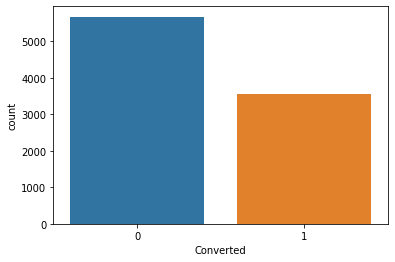

In [152]:
#Count of the conversion rates
sns.countplot(df['Converted'])
plt.show()

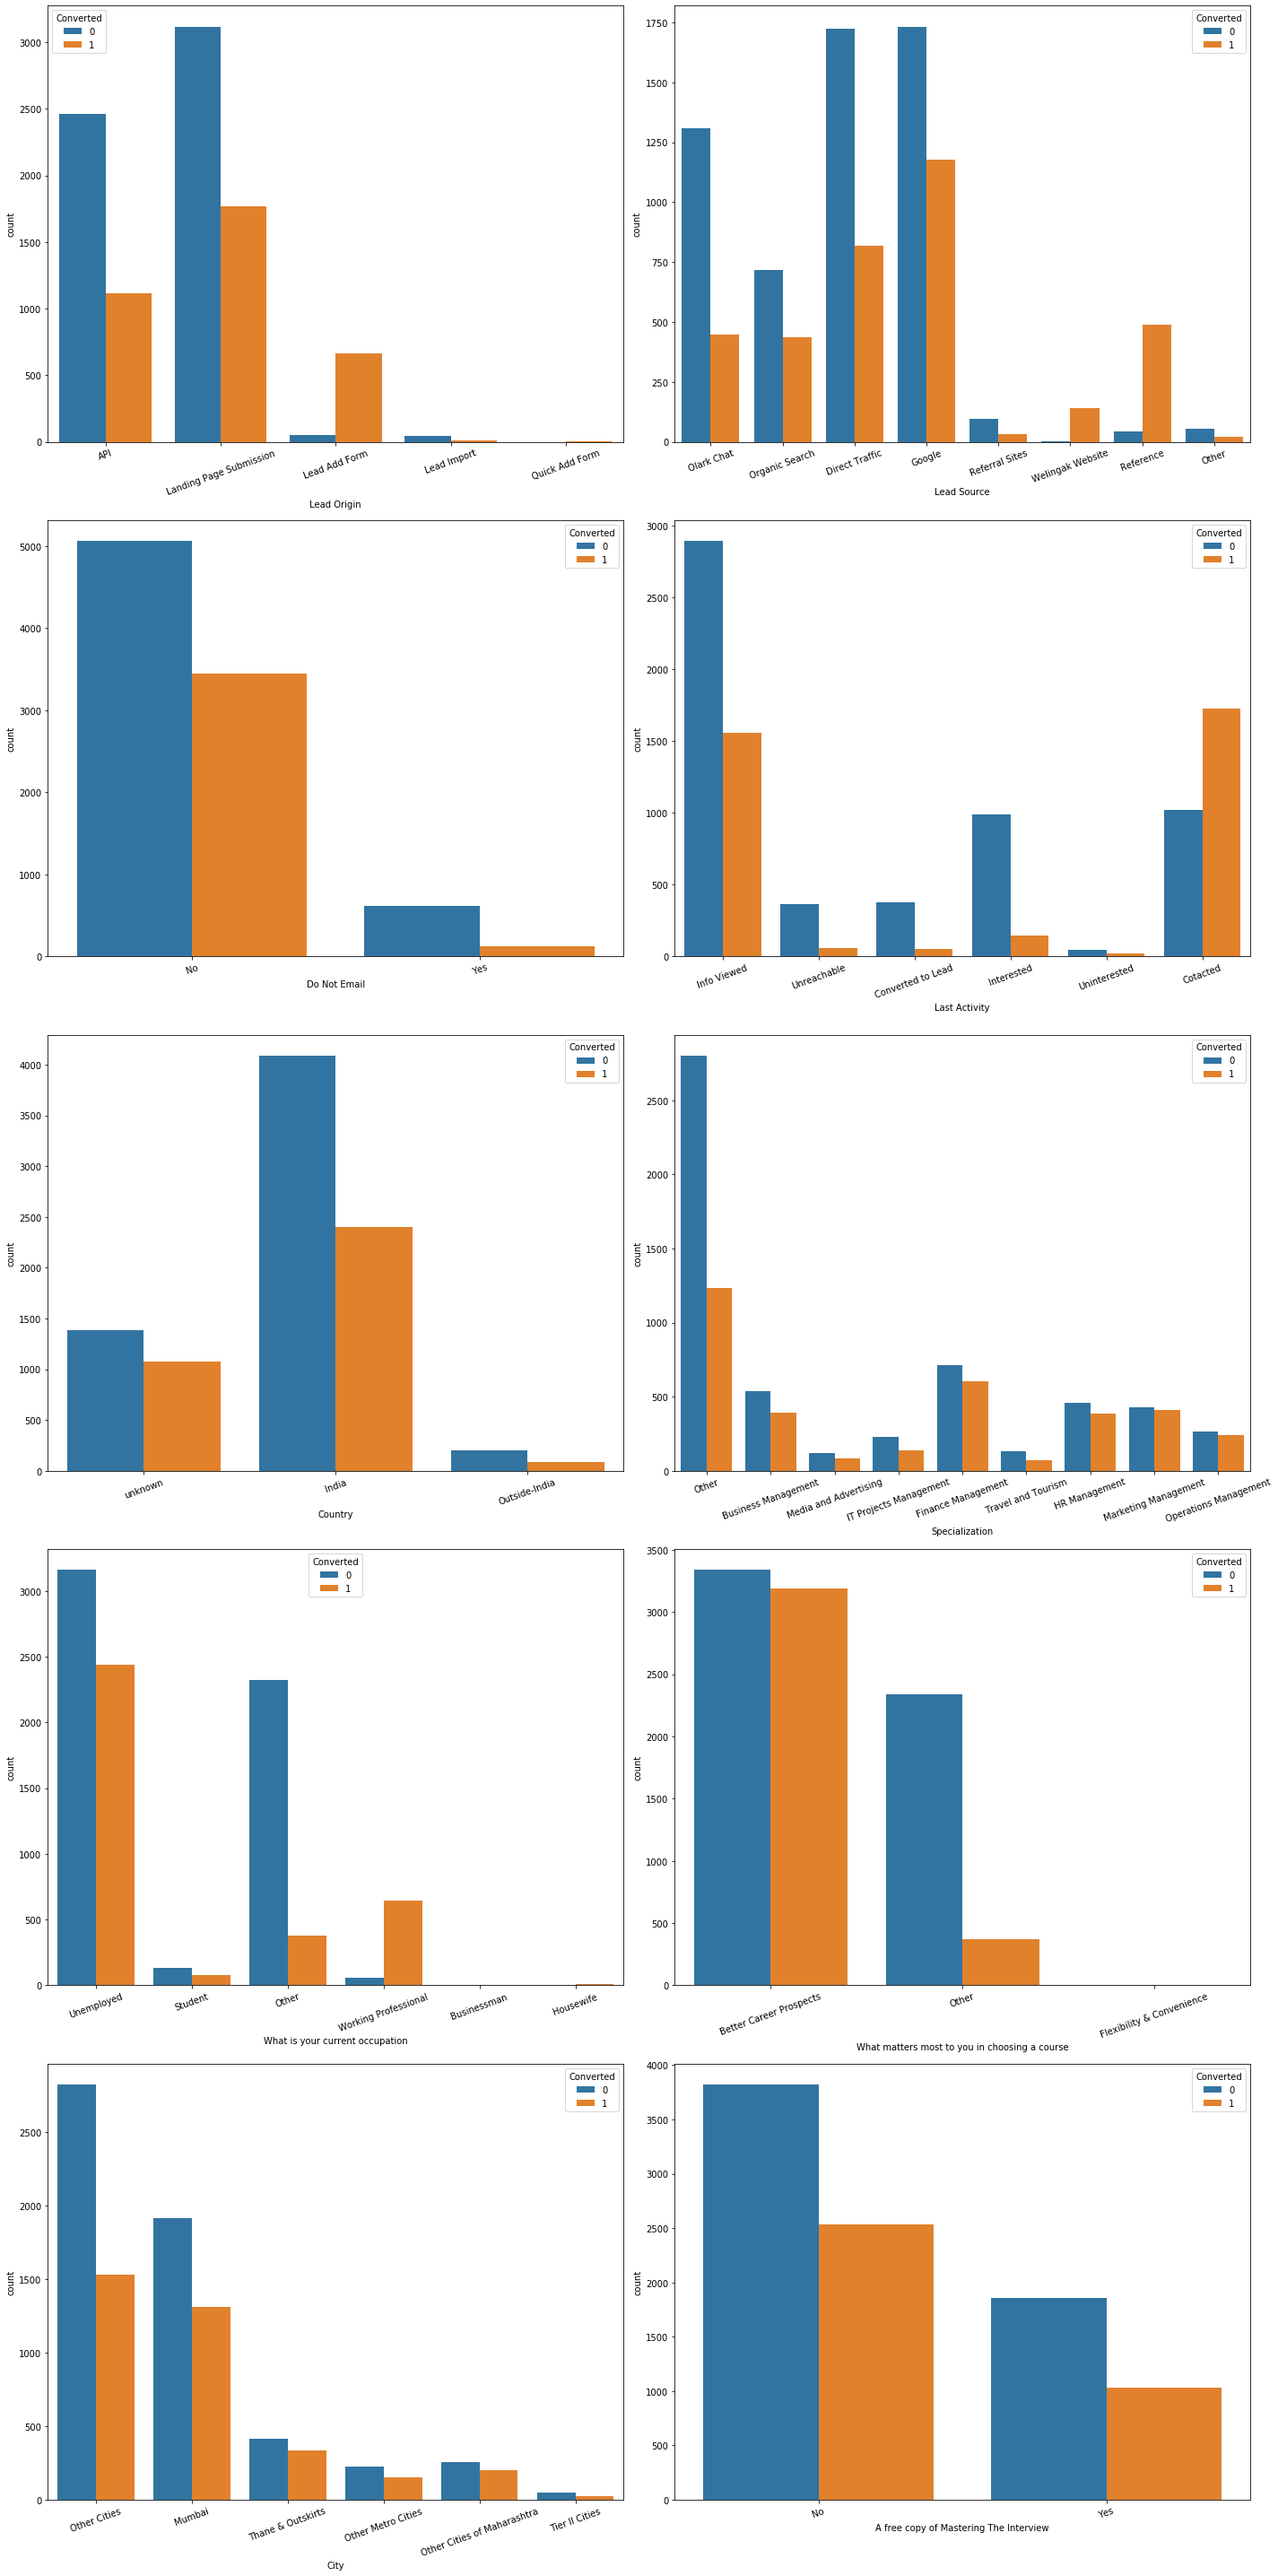

In [153]:
#Relating the categorical variables with the target variable converted
cat_var = ['Lead Origin','Lead Source','Do Not Email','Last Activity','Country','Specialization','What is your current occupation'
          ,'What matters most to you in choosing a course','City','A free copy of Mastering The Interview']

plt.figure(figsize=(20,40))

for col in cat_var:
    plt.subplot(5,2,cat_var.index(col)+1)
    sns.countplot(x=col , hue='Converted' , data=df).tick_params(axis='x',rotation=20)

plt.tight_layout()
plt.show()

## *Data Preparation*
- Creating of dummy variables 
    - creating dummy variables for multi categorical columns
    - Replacing columns with Yes/No with 0/1
- Splitting the data into train and test data
- Scaling of the columns

In [154]:
# Creating dummy variables for the categorical variables and dropping levels which are least singnificant compared to whole

#Creating dummy variable for the variable 'Lead Origin'
lo = pd.get_dummies(df['Lead Origin'] , prefix ='Lead Origin')
# Dropping Lead Origin_Quck Add form column
lo1 = lo.drop(['Lead Origin_Quick Add Form'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,lo1], axis=1)

# Creating dummy variables for the variable 'Lead Source'
ls = pd.get_dummies(df['Lead Source'], prefix='Lead Source')
# Dropping Lead Source_Other column
ls1 = ls.drop(['Lead Source_Other'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,ls1], axis=1)

# Creating dummy variables for the variable 'What matters most to you in choosing a course'
choose = pd.get_dummies(df['What matters most to you in choosing a course'], prefix='What matters most to you in choosing a course')
# Dropping What matters most to you in choosing a course_Other column
choose1 = choose.drop(['What matters most to you in choosing a course_Flexibility & Convenience'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,choose1], axis=1)

# Creating dummy variables for the variable 'Last Activity'
la = pd.get_dummies(df['Last Activity'], prefix='Last Activity')
# Dropping Last Activity_Uninterested column
la1 = la.drop(['Last Activity_Uninterested'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,la1], axis=1)

# Creating dummy variables for the variable 'Country'
co = pd.get_dummies(df['Country'], prefix='Country')
# Dropping  column Country_Outside-India
co1 = co.drop(['Country_Outside-India'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,co1], axis=1)


# Creating dummy variables for the variable 'Specialization'
sp = pd.get_dummies(df['Specialization'], prefix='Specialization')
# Dropping  column Specialization_Media and Advertising
sp1 = sp.drop(['Specialization_Media and Advertising'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,sp1], axis=1)

# Creating dummy variables for the variable 'What is your current occupation'
op = pd.get_dummies(df['What is your current occupation'], prefix='What is your current occupation')
# Dropping  column What is your current occupation_Businessman 
op1 = op.drop(['What is your current occupation_Businessman'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,op1], axis=1)


# Creating dummy variables for the variable 'City'
ct = pd.get_dummies(df['City'], prefix='City')
# Dropping  column City_Tier II Cities 
ct1 = ct.drop(['City_Tier II Cities'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,ct1], axis=1)

In [155]:
# Convert columns with 'Yes/No' to '1/0'
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].map({'Yes': 1, "No": 0})
df['Do Not Email'] = df['Do Not Email'].map({'Yes': 1, "No": 0})

In [156]:
# We have created dummies for the below variables, so we can drop the original variables
df = df.drop(['Lead Origin','Lead Source','Last Activity','What matters most to you in choosing a course','Country','Specialization','What is your current occupation','City',],1)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 45 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Lead Number                                                            9240 non-null   int64  
 1   Do Not Email                                                           9240 non-null   int64  
 2   Converted                                                              9240 non-null   int64  
 3   TotalVisits                                                            9240 non-null   float64
 4   Total Time Spent on Website                                            9240 non-null   int64  
 5   Page Views Per Visit                                                   9240 non-null   float64
 6   A free copy of Mastering The Interview                                 9240 non-null   i

#### Checking for Outliers

In [158]:
# Checking for outliers in the continuous variables
num_df = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


From the distribution shown above, we can see that there no outliers in your data. The numbers are gradually increasing.

### Test-Train Split

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
# Putting feature variable to X
X = df.drop(['Converted','Lead Number'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
0,0,0.0,0,0.0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,2.0,1532,2.0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
4,0,2.0,1428,1.0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [161]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [162]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
1871,0,-0.656434,-0.885371,-1.085519,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
6795,0,0.100767,0.005716,-0.470569,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,0
3516,0,0.290067,-0.691418,0.070401,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8105,0,0.290067,1.365219,1.226321,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3934,0,-0.656434,-0.885371,-1.085519,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [165]:
### Checking the Conversion Rate
converetd = (sum(df['Converted'])/len(df['Converted'].index))*100
converetd 

38.53896103896104

We have almost 38.5% conversion rate

### Check for correlations

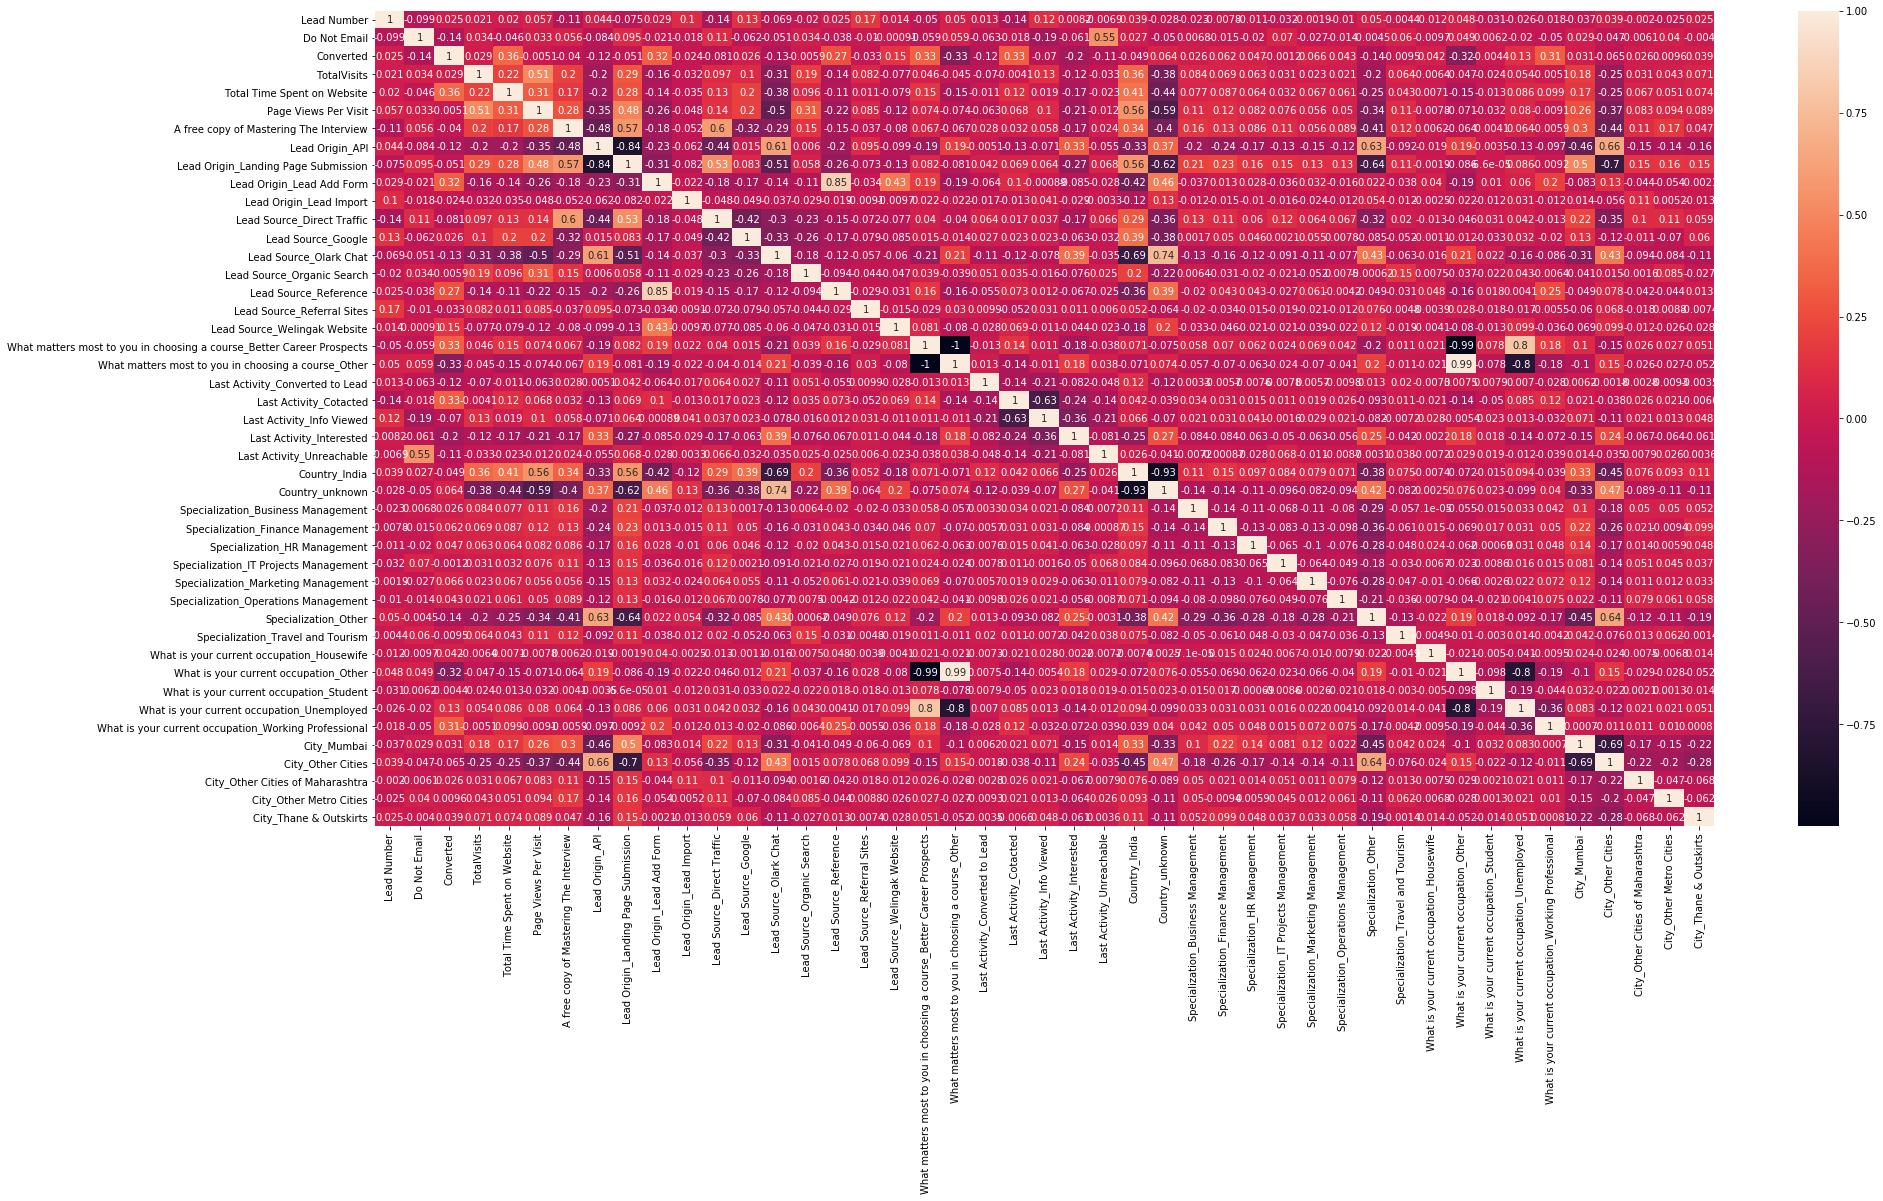

In [166]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

#### Dropping highly correlated dummy variables

In [167]:
X_test = X_test.drop(['Lead Origin_Landing Page Submission','Lead Source_Olark Chat','Country_unknown','Specialization_Other','City_Other Cities'], 1)
X_train = X_train.drop(['Lead Origin_Landing Page Submission','Lead Source_Olark Chat','Country_unknown','Specialization_Other','City_Other Cities'], 1)

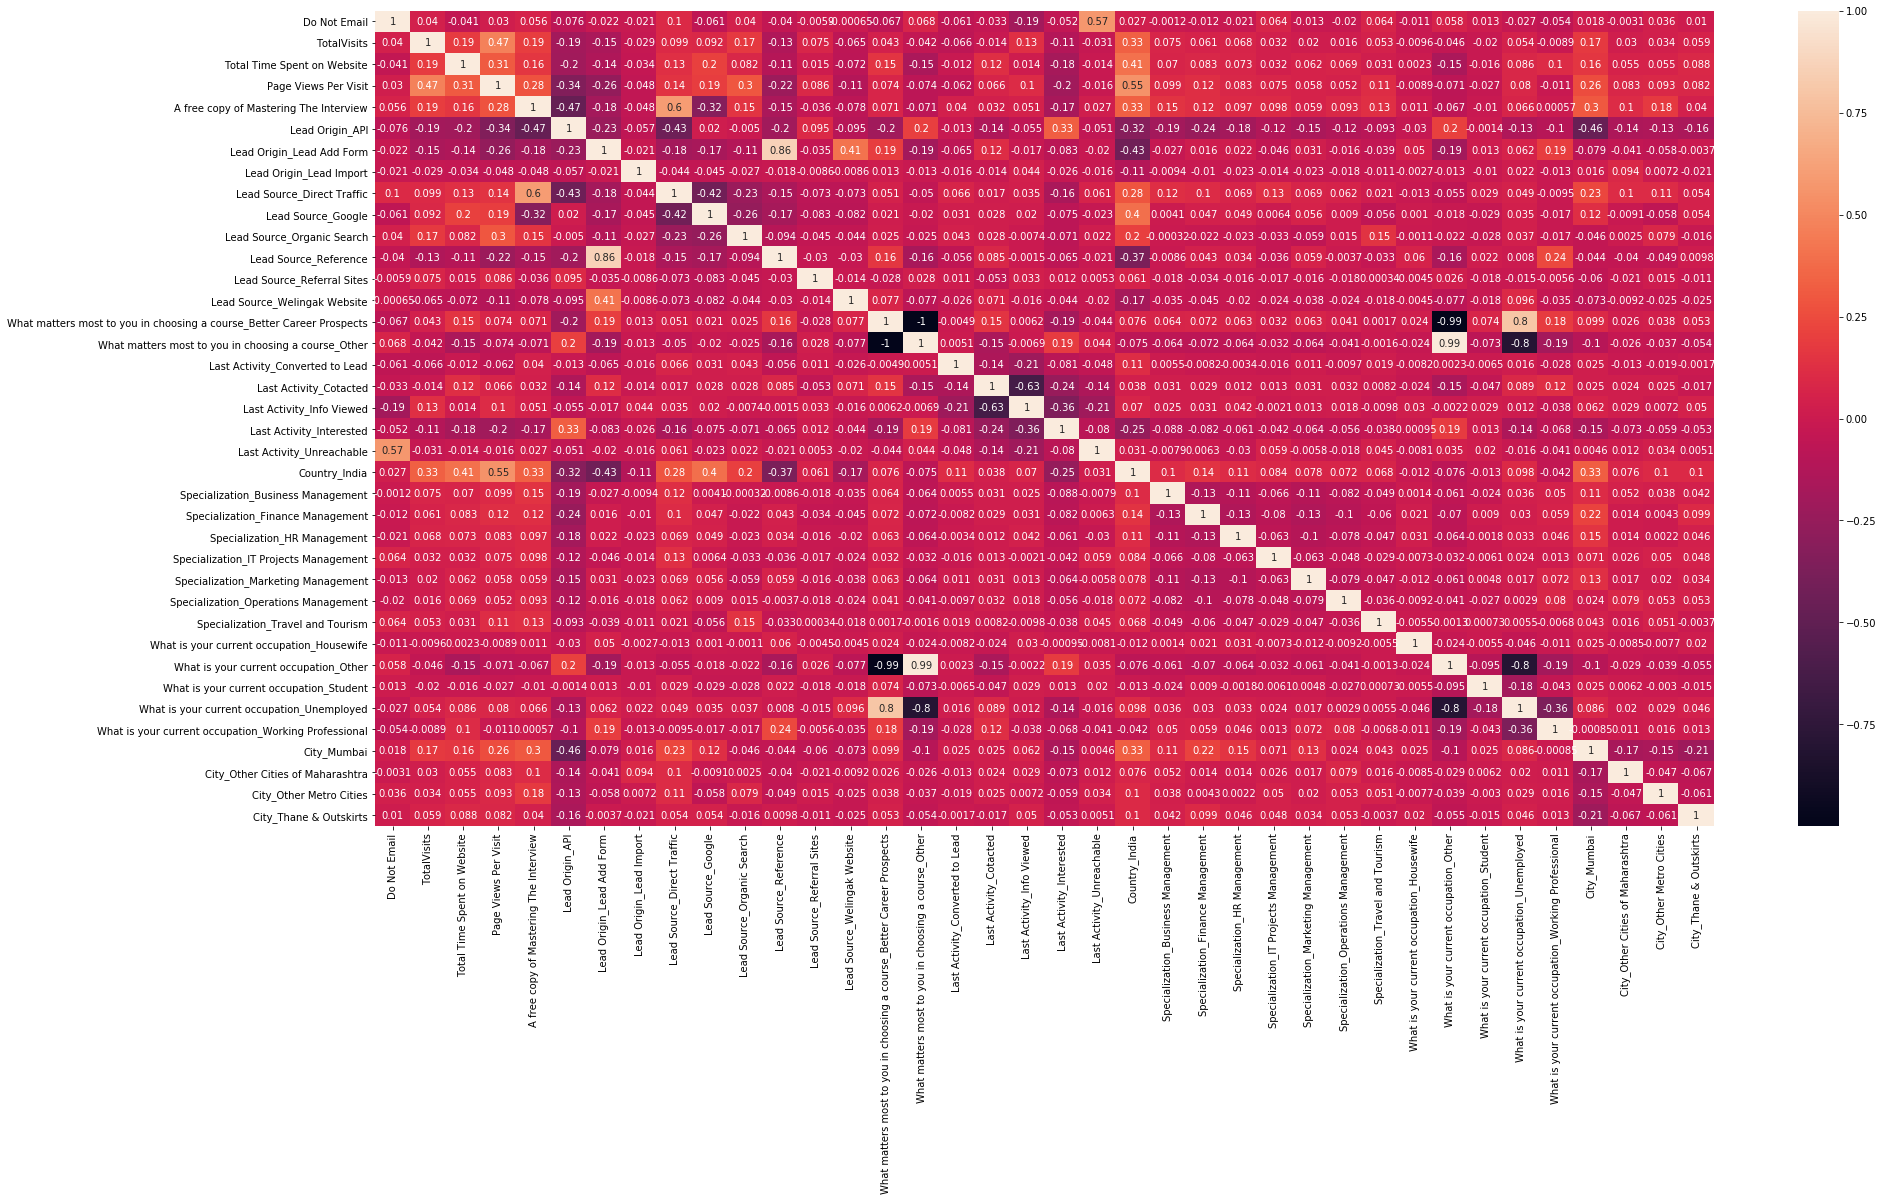

In [168]:
plt.figure(figsize = (30,15))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Model Building

In [169]:
import statsmodels.api as sm

In [170]:
# Running your first Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6429
Model Family:                Binomial   Df Model:                           38
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2611.6
Date:                Mon, 26 Oct 2020   Deviance:                       5223.3
Time:                        20:36:54   Pearson chi2:                 6.76e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -1.6430      2.874     -0.572      0.568      -7.276       3.990
Do Not Email                                                             -1.3605      0.199     -6.832      0.000      -1.751      -0.970
TotalVisits                                                               0.1832      0.048      3.788      0.000       0.088       0.278
Total Time Spent on Website                                               1.0752      0.040     26.669      0.000       0.996       1.154
Page Views Per Visit                                                     -0.1585      0.053     -2.993      0.003      -0.262      -0.055
A free copy of Mastering The Interview                                   -0.1311      0.108     -1.216      0.224      -0.342       0.080
Lead Origin_API                                                           0.6640      0.131      5.059      0.000       0.407       0.921
Lead Origin_Lead Add Form                                                 2.7867      0.507      5.492      0.000       1.792       3.781
Lead Origin_Lead Import                                                  -1.1542      0.539     -2.141      0.032      -2.211      -0.097
Lead Source_Direct Traffic                                               -0.9443      0.199     -4.736      0.000      -1.335      -0.553
Lead Source_Google                                                       -0.6816      0.189     -3.603      0.000      -1.052      -0.311
Lead Source_Organic Search                                               -0.7048      0.209     -3.374      0.001      -1.114      -0.295
Lead Source_Reference                                                    -0.2421      0.540     -0.448      0.654      -1.301       0.817
Lead Source_Referral Sites                                               -0.8150      0.353     -2.307      0.021      -1.507      -0.123
Lead Source_Welingak Website                                              1.9708      0.881      2.237      0.025       0.244       3.698
What matters most to you in choosing a course_Better Career Prospects     2.2688      2.634      0.861      0.389      -2.893       7.431
What matters most to you in choosing a course_Other                       0.8248      2.710      0.304      0.761      -4.488       6.137
Last Activity_Converted to Lead                                          -2.2528      0.522     -4.315      0.000      -3.276      -1.229
Last Activity_Cotacted                                                    0.2073      0.475      0.436      0.663      -0.724       1.138
Last Activity_Info Viewed                      

### Feature Selection using RFE
- Since there are many features , will use RFE to select features which are more relevant for target value prediction

In [171]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [172]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [173]:
rfe.support_

array([ True, False,  True, False, False, False,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False])

In [174]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('A free copy of Mastering The Interview', False, 23),
 ('Lead Origin_API', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', False, 24),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('What matters most to you in choosing a course_Better Career Prospects',
  True,
  1),
 ('What matters most to you in choosing a course_Other', False, 2),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Cotacted', True, 1),
 ('Last Activity_Info Viewed', False, 15),
 ('Last Activity_Interested', True, 1),
 ('Last Activity_Unreachable', False, 6),
 ('Country_India', False, 12),
 ('Specialization_Business Management', False, 20),
 

In [175]:
col = X_train.columns[rfe.support_]

In [176]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_API',
       'Lead Source_Reference',
       'What matters most to you in choosing a course_Other',
       'Last Activity_Info Viewed', 'Last Activity_Unreachable',
       'Country_India', 'Specialization_Business Management',
       'Specialization_Finance Management', 'Specialization_HR Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Mumbai',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts'],
      dtype='object')

##### Assessing the model with StatsModels

In [177]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2655.0
Date:                Mon, 26 Oct 2020   Deviance:                       5310.0
Time:                        20:36:58   Pearson chi2:                 6.83e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -1.0872      0.107    -10.134      0.000      -1.297      -0.877
Do Not Email                                                             -1.3359      0.163     -8.183      0.000      -1.656      -1.016
Total Time Spent on Website                                               1.0682      0.039     27.190      0.000       0.991       1.145
Lead Origin_Lead Add Form                                                 2.2286      0.194     11.476      0.000       1.848       2.609
Lead Origin_Lead Import                                                  -1.4907      0.521     -2.863      0.004      -2.511      -0.470
Lead Source_Direct Traffic                                               -1.4247      0.116    -12.322      0.000      -1.651      -1.198
Lead Source_Google                                                       -1.0170      0.108     -9.381      0.000      -1.229      -0.805
Lead Source_Organic Search                                               -1.1953      0.133     -8.978      0.000      -1.456      -0.934
Lead Source_Referral Sites                                               -1.1612      0.319     -3.639      0.000      -1.787      -0.536
Lead Source_Welingak Website                                              1.8164      0.743      2.445      0.014       0.360       3.272
What matters most to you in choosing a course_Better Career Prospects     1.1921      0.086     13.883      0.000       1.024       1.360
Last Activity_Converted to Lead                                          -1.2296      0.221     -5.576      0.000      -1.662      -0.797
Last Activity_Cotacted                                                    1.2015      0.075     16.048      0.000       1.055       1.348
Last Activity_Interested                                                 -0.9431      0.140     -6.749      0.000      -1.217      -0.669
What is your current occupation_Housewife                                22.7902   1.37e+04      0.002      0.999   -2.68e+04    2.68e+04
What is your current occupation_Working Professional                      2.5761      0.188     13.718      0.000       2.208       2.944
=========================================================================================================================================
"""

In [178]:
# Dropping variables with the p-value greater than 5%
X_train_sm = X_train_sm.drop('What is your current occupation_Housewife', 1)


In [179]:
X_train_sm_3 = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2661.6
Date:                Mon, 26 Oct 2020   Deviance:                       5323.1
Time:                        20:36:58   Pearson chi2:                 6.84e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -1.0901      0.107    -10.165      0.000      -1.300      -0.880
Do Not Email                                                             -1.3412      0.163     -8.214      0.000      -1.661      -1.021
Total Time Spent on Website                                               1.0674      0.039     27.195      0.000       0.990       1.144
Lead Origin_Lead Add Form                                                 2.2483      0.194     11.597      0.000       1.868       2.628
Lead Origin_Lead Import                                                  -1.4894      0.520     -2.862      0.004      -2.510      -0.469
Lead Source_Direct Traffic                                               -1.4191      0.116    -12.286      0.000      -1.646      -1.193
Lead Source_Google                                                       -1.0097      0.108     -9.325      0.000      -1.222      -0.797
Lead Source_Organic Search                                               -1.1848      0.133     -8.913      0.000      -1.445      -0.924
Lead Source_Referral Sites                                               -1.1612      0.319     -3.640      0.000      -1.786      -0.536
Lead Source_Welingak Website                                              1.7980      0.743      2.421      0.015       0.342       3.254
What matters most to you in choosing a course_Better Career Prospects     1.1968      0.086     13.947      0.000       1.029       1.365
Last Activity_Converted to Lead                                          -1.2365      0.220     -5.609      0.000      -1.669      -0.804
Last Activity_Cotacted                                                    1.1947      0.075     15.968      0.000       1.048       1.341
Last Activity_Interested                                                 -0.9340      0.139     -6.713      0.000      -1.207      -0.661
What is your current occupation_Working Professional                      2.5697      0.188     13.685      0.000       2.202       2.938
=========================================================================================================================================
"""

#### Checking VIFs

In [180]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [181]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,9.61
5,Lead Source_Direct Traffic,2.25
6,Lead Source_Google,2.25
7,Lead Source_Organic Search,1.68
3,Lead Origin_Lead Add Form,1.66
2,Total Time Spent on Website,1.26
13,Last Activity_Interested,1.25
9,Lead Source_Welingak Website,1.22
10,What matters most to you in choosing a course_...,1.14
12,Last Activity_Cotacted,1.13


#### VIF values within threshold of 5

In [182]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.301892
6795    0.213105
3516    0.347219
8105    0.851817
3934    0.301892
4844    0.988346
3297    0.135042
8071    0.976145
987     0.055142
7423    0.916772
dtype: float64

In [183]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30189152, 0.21310537, 0.34721873, 0.85181665, 0.30189152,
       0.98834597, 0.13504208, 0.97614544, 0.05514242, 0.91677199])

##### Creating a dataframe with the actual Converted values and the predicted probabilities

In [184]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number
0,0,0.301892,1871
1,0,0.213105,6795
2,0,0.347219,3516
3,0,0.851817,8105
4,0,0.301892,3934


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [185]:
y_train_pred_final['predicted_low'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted_low
0,0,0.301892,1871,0
1,0,0.213105,6795,0
2,0,0.347219,3516,0
3,0,0.851817,8105,1
4,0,0.301892,3934,0


In [186]:
from sklearn import metrics

In [187]:
# Confusion matrix 
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted_low )
print(confusion1)

[[3562  440]
 [ 748 1718]]


In [188]:
# Predicted     not_Converted  Converted
# Actual
# not_Converted        3564      438
# Converted            762       1704  

In [189]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted_low))

0.8163265306122449


In [190]:
##### Creating new column 'predicted' with 1 if Churn_Prob > 0.8 else 0

In [191]:
y_train_pred_final['predicted_high'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.8 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted_low,predicted_high
0,0,0.301892,1871,0,0
1,0,0.213105,6795,0,0
2,0,0.347219,3516,0,0
3,0,0.851817,8105,1,1
4,0,0.301892,3934,0,0


In [192]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted_high )
print(confusion2)

[[3871  131]
 [1403 1063]]


In [193]:
# Predicted     not_Converted  Converted
# Actual
# not_Converted        3879      123
# Converted            1499      967  

In [194]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted_high))

0.7628324056895486


## Metrics beyond simply accuracy

#### For lower threshold of 0.5

In [195]:
TP1 = confusion1[1,1] # true positive 
TN1 = confusion1[0,0] # true negatives
FP1 = confusion1[0,1] # false positives
FN1 = confusion1[1,0] # false negatives

In [196]:
# Let's see the sensitivity of our logistic regression model
TP1 / float(TP1+FN1)

0.6966747769667477

In [197]:
# Let us calculate specificity
TN1 / float(TN1+FP1)

0.8900549725137431

In [198]:
# Calculate false postive rate - predicting Conversion when customer has not have Converted
print(FP1/ float(TN1+FP1))

0.10994502748625687


In [199]:
# positive predictive value 
print (TP1 / float(TP1+FP1))

0.7961075069508804


In [200]:
# Negative predictive value
print (TN1 / float(TN1+ FN1))

0.8264501160092808


#### For higher threshold of 0.8

In [201]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

In [202]:
# Let's see the sensitivity of our logistic regression model
TP2 / float(TP2+FN2)

0.4310624493106245

In [203]:
# Let us calculate specificity
TN2 / float(TN2+FP2)

0.9672663668165917

In [204]:
# Calculate false postive rate - predicting Conversion when customer has not have Converted
print(FP2/ float(TN2+FP2))

0.032733633183408294


In [205]:
# positive predictive value 
print (TP2 / float(TP2+FP2))

0.890284757118928


In [206]:
# Negative predictive value
print (TN2 / float(TN2+ FN2))

0.7339780053090633


### Plotting the ROC Curve

In [207]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [208]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

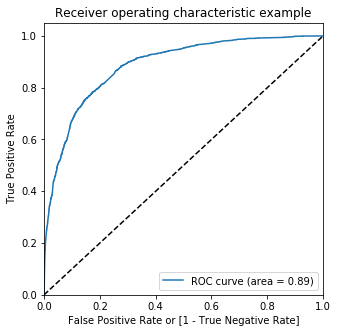

In [209]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Finding Optimal Cutoff Point

In [210]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted_low,predicted_high,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.301892,1871,0,0,1,1,1,1,0,0,0,0,0,0
1,0,0.213105,6795,0,0,1,1,1,0,0,0,0,0,0,0
2,0,0.347219,3516,0,0,1,1,1,1,0,0,0,0,0,0
3,0,0.851817,8105,1,1,1,1,1,1,1,1,1,1,1,0
4,0,0.301892,3934,0,0,1,1,1,1,0,0,0,0,0,0


In [211]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.598639  0.979319  0.364068
0.2   0.2  0.759431  0.915247  0.663418
0.3   0.3  0.789889  0.865775  0.743128
0.4   0.4  0.812461  0.761963  0.843578
0.5   0.5  0.816327  0.696675  0.890055
0.6   0.6  0.796537  0.593674  0.921539
0.7   0.7  0.781385  0.517437  0.944028
0.8   0.8  0.762832  0.431062  0.967266
0.9   0.9  0.716914  0.278183  0.987256


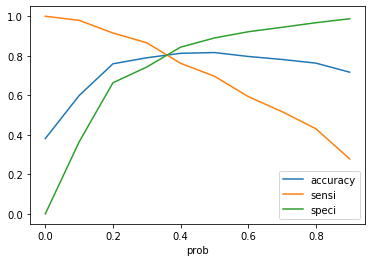

In [212]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

In [213]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted_low,predicted_high,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.301892,1871,0,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.213105,6795,0,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.347219,3516,0,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.851817,8105,1,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.301892,3934,0,0,1,1,1,1,0,0,0,0,0,0,0


In [214]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8099876314162029

In [215]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion3

array([[3323,  679],
       [ 550, 1916]], dtype=int64)

In [216]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [217]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7769667477696675

In [218]:
# Let us calculate specificity
TN / float(TN+FP)

0.8303348325837081

In [219]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.16966516741629187


In [220]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7383429672447014


In [221]:
# Negative predictive value
print (TN / float(TN+ FN))

0.857991221275497


## Precision and Recall

In [222]:
from sklearn.metrics import precision_score, recall_score

In [223]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7383429672447014

In [224]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7769667477696675

### Precision and recall tradeoff

In [225]:
from sklearn.metrics import precision_recall_curve

In [226]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: final_predicted, Length: 6468, dtype: int64)

In [227]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

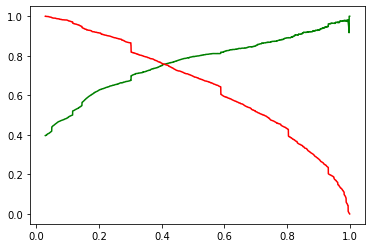

In [228]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [229]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [230]:
X_test = X_test[col]
X_test = X_test.drop(['What is your current occupation_Housewife'],1)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 14 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Do Not Email                                                           2772 non-null   int64  
 1   Total Time Spent on Website                                            2772 non-null   float64
 2   Lead Origin_Lead Add Form                                              2772 non-null   uint8  
 3   Lead Origin_Lead Import                                                2772 non-null   uint8  
 4   Lead Source_Direct Traffic                                             2772 non-null   uint8  
 5   Lead Source_Google                                                     2772 non-null   uint8  
 6   Lead Source_Organic Search                                             2772 non-null 

In [231]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [232]:
y_test_pred = res.predict(X_test_sm)

In [233]:
y_test_pred[:10]

4269    0.429214
2376    0.931163
7766    0.697819
9199    0.145253
4359    0.803765
9186    0.632268
1631    0.532560
8963    0.210059
8007    0.026353
5324    0.415614
dtype: float64

In [234]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [235]:
y_pred_1.head()

,0
4269,0.429214
2376,0.931163
7766,0.697819
9199,0.145253
4359,0.803765


In [236]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [237]:
# Putting LeadNumber to index
y_test_df['Lead Number'] = y_test_df.index

In [238]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [239]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [240]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.429214
1,1,2376,0.931163
2,1,7766,0.697819
3,0,9199,0.145253
4,1,4359,0.803765


In [241]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [242]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Conversion_Prob'], axis=1)

In [243]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Conversion_Prob
0,4269,1,0.429214
1,2376,1,0.931163
2,7766,1,0.697819
3,9199,0,0.145253
4,4359,1,0.803765


In [244]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [245]:
y_pred_final.head()

,Lead Number,Converted,Conversion_Prob,final_predicted
0,4269,1,0.429214,1
1,2376,1,0.931163,1
2,7766,1,0.697819,1
3,9199,0,0.145253,0
4,4359,1,0.803765,1


In [246]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8138528138528138

In [247]:
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion4

array([[1412,  265],
       [ 251,  844]], dtype=int64)

In [248]:
TP4 = confusion4[1,1] # true positive 
TN4 = confusion4[0,0] # true negatives
FP4 = confusion4[0,1] # false positives
FN4 = confusion4[1,0] # false negatives

In [249]:
# Let's see the sensitivity of our logistic regression model
TP4 / float(TP4+FN4)

0.7707762557077625

In [250]:
# Let us calculate specificity
TN4 / float(TN4+FP4)

0.8419797257006559

In [251]:
### Checking the Conversion Rate on test data
converetd = (sum(y_train_pred_final['final_predicted'])/len(y_train_pred_final['final_predicted'].index))*100
converetd 

40.12059369202227

In [252]:
### Checking the Conversion Rate on test data
converetd = (sum(y_pred_final['final_predicted'])/len(y_pred_final['final_predicted'].index))*100
converetd 

40.00721500721501

## The team must concentrate most on below features so that they can make pursue hot leads and increase the conversion rate

- What is your current occupation_Working Professional	
- When the Lead Origin is Lead Add Form
- Lead Source_Welingak Website
- What matters most to you in choosing a course_Better Career Prospects
- Last Activity_Contacted
- Total Time Spent on Website